In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('./data/titanic.csv')

In [3]:
df.head()

,Cabin,Ticket,number,Survived
0,NaN,A/5 21171,5,0
1,C85,PC 17599,3,1
2,NaN,STON/O2. 3101282,6,1
3,C123,113803,3,1
4,NaN,373450,A,0


In [4]:
df['number'].unique()

<StringArray>
['5', '3', '6', 'A', '2', '1', '4']
Length: 7, dtype: str

Text(0.5, 1.0, 'Passangers travelling with')

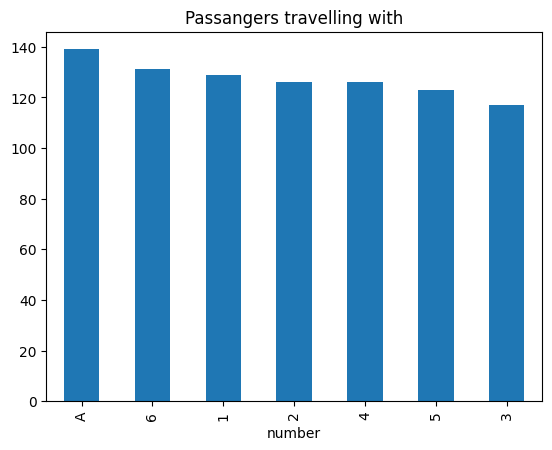

In [6]:
fig = df['number'].value_counts().plot.bar()
fig.set_title('Passangers travelling with')

In [7]:
# Extract Numerical parts
df['number_numerical'] = pd.to_numeric(df['number'],errors='coerce',downcast='integer')

In [8]:
df['number_categorical'] = np.where(df['number_numerical'].isnull(),df['number'],np.nan)

In [9]:
df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical
0,NaN,A/5 21171,5,0,5.0,NaN
1,C85,PC 17599,3,1,3.0,NaN
2,NaN,STON/O2. 3101282,6,1,6.0,NaN
3,C123,113803,3,1,3.0,NaN
4,NaN,373450,A,0,NaN,A


In [10]:
df['Cabin'].unique()

<StringArray>
[          nan,         'C85',        'C123',         'E46',          'G6',
        'C103',         'D56',          'A6', 'C23 C25 C27',         'B78',
 ...
        'B102',         'B69',         'E49',         'C47',         'D28',
         'E17',         'A24',         'C50',         'B42',        'C148']
Length: 148, dtype: str

In [11]:
df['Ticket'].unique()

<StringArray>
[       'A/5 21171',         'PC 17599', 'STON/O2. 3101282',
           '113803',           '373450',           '330877',
            '17463',           '349909',           '347742',
           '237736',
 ...
           '349212',           '349217',           '349257',
             '7552', 'C.A./SOTON 34068',  'SOTON/OQ 392076',
           '211536',           '112053',           '111369',
           '370376']
Length: 681, dtype: str

In [13]:
# Capture numeric parts
df['cabin_num'] = df['Cabin'].str.extract('(\d+)')

# Capture the first letter
df['cabin_cat'] = df['Cabin'].str[0]

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/var/folders/zg/vww70hbs5c3dpv0511jq60qw0000gn/T/ipykernel_7533/2410361210.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['cabin_num'] = df['Cabin'].str.extract('(\d+)')


In [14]:
df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_num,cabin_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN
1,C85,PC 17599,3,1,3.0,NaN,85,C
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN
3,C123,113803,3,1,3.0,NaN,123,C
4,NaN,373450,A,0,NaN,A,NaN,NaN


<Axes: xlabel='cabin_cat'>

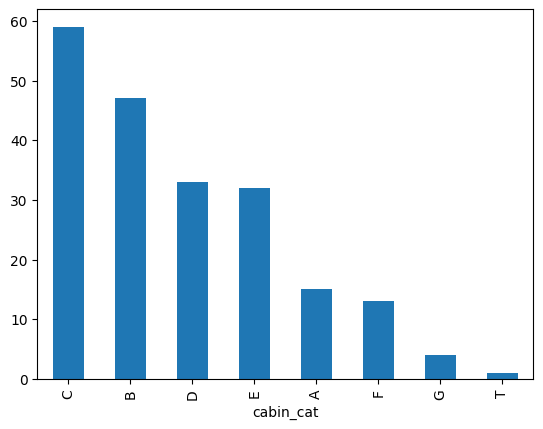

In [15]:
df['cabin_cat'].value_counts().plot(kind='bar')

In [18]:
# Extract the last bits of ticket as number
df['ticket_num'] = df['Ticket'].apply(lambda s: s.split()[-1])
df['ticket_num'] = pd.to_numeric(df['ticket_num'],errors='coerce',downcast='integer')

In [19]:
# Extract first parts of ticket as category
df['ticket_cat'] = df['Ticket'].apply(lambda s: s.split()[0])
df['ticket_cat'] = np.where(df['ticket_cat'].str.isdigit(),np.nan,df['ticket_cat'])

In [22]:
df.head(20)

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_num,cabin_cat,ticket_num,ticket_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN,21171.0,A/5
1,C85,PC 17599,3,1,3.0,NaN,85,C,17599.0,PC
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN,3101282.0,STON/O2.
3,C123,113803,3,1,3.0,NaN,123,C,113803.0,NaN
4,NaN,373450,A,0,NaN,A,NaN,NaN,373450.0,NaN
5,NaN,330877,2,0,2.0,NaN,NaN,NaN,330877.0,NaN
6,E46,17463,2,0,2.0,NaN,46,E,17463.0,NaN
7,NaN,349909,5,0,5.0,NaN,NaN,NaN,349909.0,NaN
8,NaN,347742,1,1,1.0,NaN,NaN,NaN,347742.0,NaN
9,NaN,237736,A,1,NaN,A,NaN,NaN,237736.0,NaN


In [23]:
df['ticket_cat'].unique()

<StringArray>
[       'A/5',         'PC',   'STON/O2.',          nan,         'PP',
       'A/5.',       'C.A.',      'A./5.',   'SC/Paris',  'S.C./A.4.',
       'A/4.',         'CA',       'S.P.',     'S.O.C.',       'SO/C',
      'W./C.',   'SOTON/OQ',     'W.E.P.',     'STON/O',        'A4.',
          'C', 'SOTON/O.Q.',   'SC/PARIS',     'S.O.P.',       'A.5.',
         'Fa',        'CA.',       'LINE',     'F.C.C.',        'W/C',
      'SW/PP',      'SCO/W',       'P/PP',         'SC',      'SC/AH',
        'A/S',        'A/4',       'WE/P',    'S.W./PP',  'S.O./P.P.',
       'F.C.',   'SOTON/O2', 'S.C./PARIS', 'C.A./SOTON']
Length: 44, dtype: str